### Importing several libraries, sets up the environment for data analysis and machine learning, and importing various functions and classes needed for this project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame



### Reading our dataset and creating our dataframe

In [2]:
df = pd.read_csv("datasets/cc_approvals.data", header=None)

# Inspect data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


#### We will use the info method to see if we have missing values, number of columns and the datatypes of each columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


#### Here is the summary statistics for the numerical columns

In [4]:
df.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


#### Here we are looping through each column in a DataFrame df and printing out the unique values of each column if the column's data type is categorical. The purpose of this code is to help you understand the unique categorical values present in each column of the DataFrame.

In [5]:
for column_name in df.columns:
    if df[column_name].dtype == object:
        unique_values = df[column_name].unique()
        print(f"Column: {column_name}")
        print("Unique Values:", unique_values)
        print("=" * 30)



Column: 0
Unique Values: ['b' 'a' '?']
Column: 1
Unique Values: ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67'

##### This line of code is replacing all occurrences of the string '?' in a DataFrame df with np.nan, which stands for "Not a Number" and is a special value often used to represent missing or undefined data in pandas.

In [6]:
df = df.replace('?',np.nan)

In [7]:
print (df.isnull().sum ())

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


This code first calculates the number of missing values in each column using df.isnull().sum(), and then filters out only the columns with non-zero missing values. The resulting columns_with_missing Series is then used to create a bar plot using matplotlib.

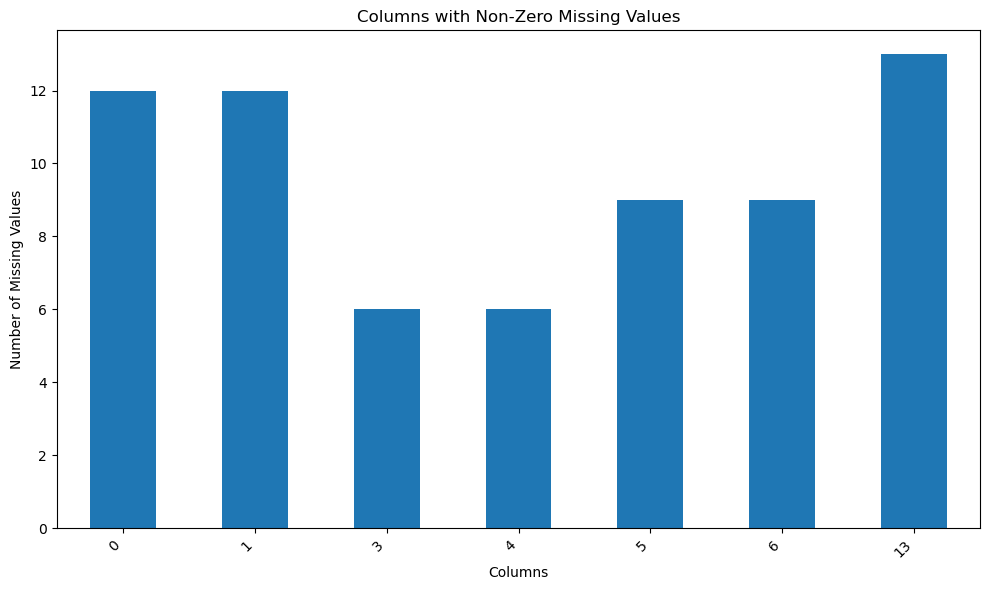

In [8]:
missing_values = df.isnull().sum()

# Filter columns with non-zero missing values
columns_with_missing = missing_values[missing_values > 0]

# Create a bar plot for columns with missing values
plt.figure(figsize=(10, 6))
columns_with_missing.plot(kind='bar')
plt.title("Columns with Non-Zero Missing Values")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()






#### We have used the pandas fill method to replace missing values with the value from the previous row. For missing values in the numerical columns, we replaced them with the mean of non-missing values in that column. Now the dataset contains no missing values.

In [9]:
def fix_missing_mean(df,col):
    #replace missing values with mean 
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mean(), inplace = True)    

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')  
    

In [10]:
fix_missing_ffill(df,0)
fix_missing_ffill(df,1)
fix_missing_ffill(df,3)
fix_missing_ffill(df,4)
fix_missing_ffill(df,5)
fix_missing_ffill(df,6)
fix_missing_mean(df,13)

In [11]:
# Separate target from features
y = df[15]
features = df.drop([15], axis=1)
# Preview features
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


#### If the data contains categorical values, then we need to convert them to numerical before applying a machine learning algorithm. In our project, we will be using the ordinal encoding method to transform the categorical feature variables into numeric.

In [26]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

object_cols = [0, 1, 3, 4, 5, 6, 8, 9, 11, 12, 13]
ordinal_encoder = OrdinalEncoder()

X_encoded = features.copy()

# Perform ordinal encoding on selected columns
X_encoded[object_cols] = ordinal_encoder.fit_transform(features[object_cols])

# Display the ordinal-encoded DataFrame
print(X_encoded.head())

# Save the ordinal-encoded DataFrame to a new CSV file
X_encoded.to_csv('encoded_data.csv', index=False)


    0      1      2    3    4     5    6     7    8    9   10   11   12    13  \
0  1.0  156.0  0.000  1.0  0.0  12.0  7.0  1.25  1.0  1.0   1  0.0  0.0  69.0   
1  0.0  328.0  4.460  1.0  0.0  10.0  3.0  3.04  1.0  1.0   6  0.0  0.0  11.0   
2  0.0   89.0  0.500  1.0  0.0  10.0  3.0  1.50  1.0  0.0   0  0.0  0.0  97.0   
3  1.0  125.0  1.540  1.0  0.0  12.0  7.0  3.75  1.0  1.0   5  1.0  0.0  31.0   
4  1.0   43.0  5.625  1.0  0.0  12.0  7.0  1.71  1.0  0.0   0  0.0  2.0  37.0   

    14  
0    0  
1  560  
2  824  
3    3  
4    0  


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    float64
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       690 non-null    float64
 4   4       690 non-null    float64
 5   5       690 non-null    float64
 6   6       690 non-null    float64
 7   7       690 non-null    float64
 8   8       690 non-null    float64
 9   9       690 non-null    float64
 10  10      690 non-null    int64  
 11  11      690 non-null    float64
 12  12      690 non-null    float64
 13  13      690 non-null    float64
 14  14      690 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 81.0 KB


#### We will check for outliers by visualizing it

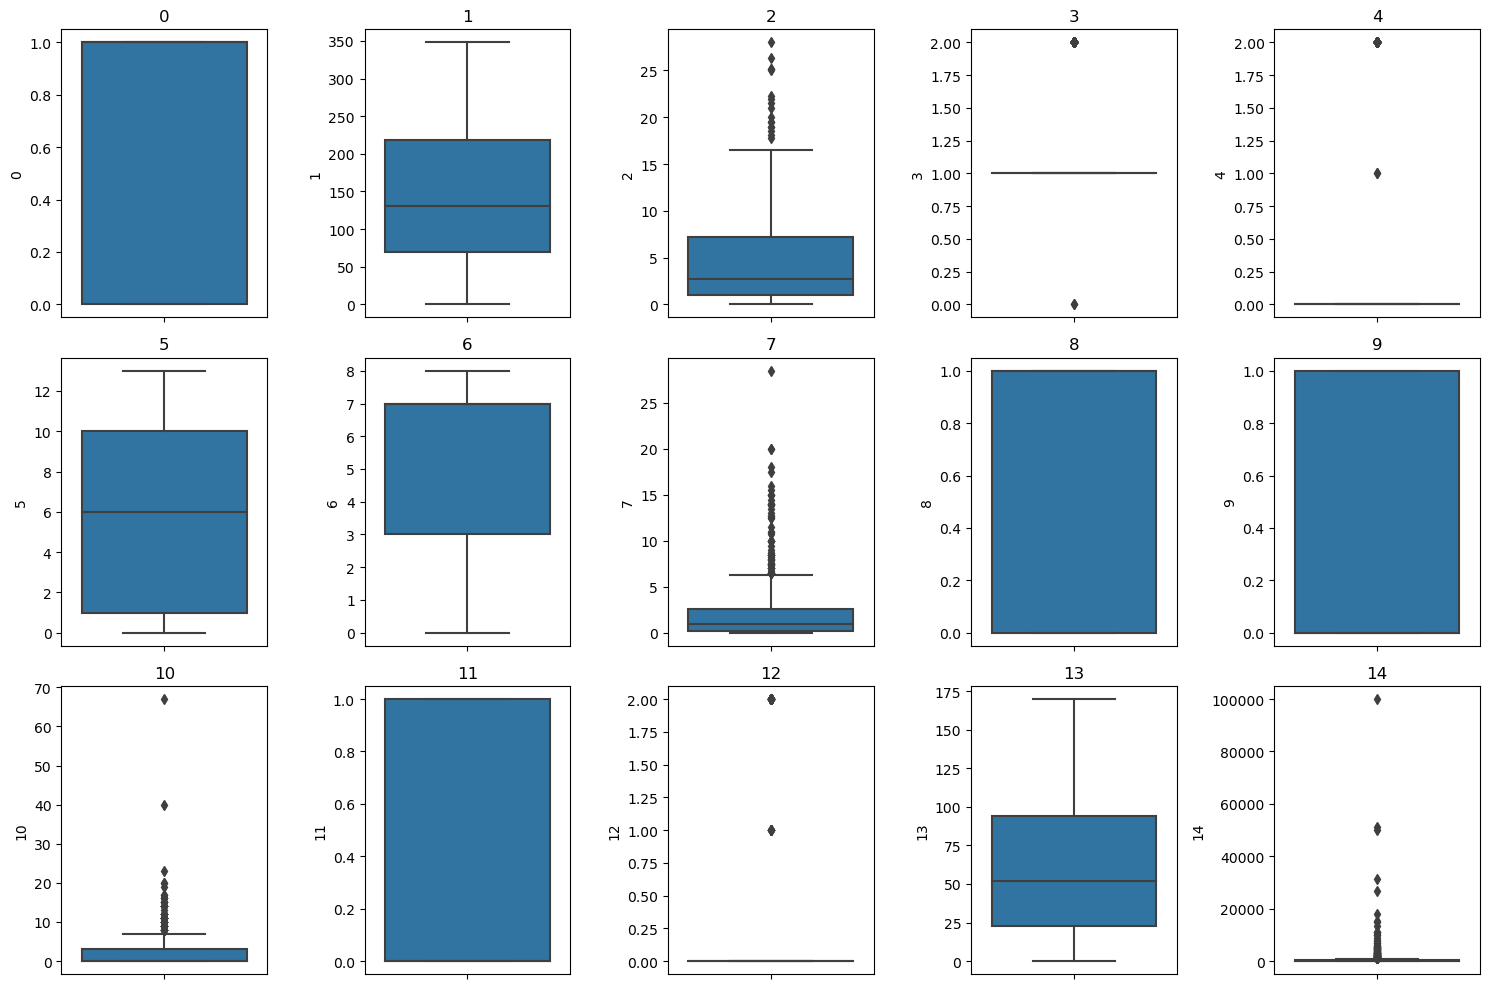

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data=X, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()




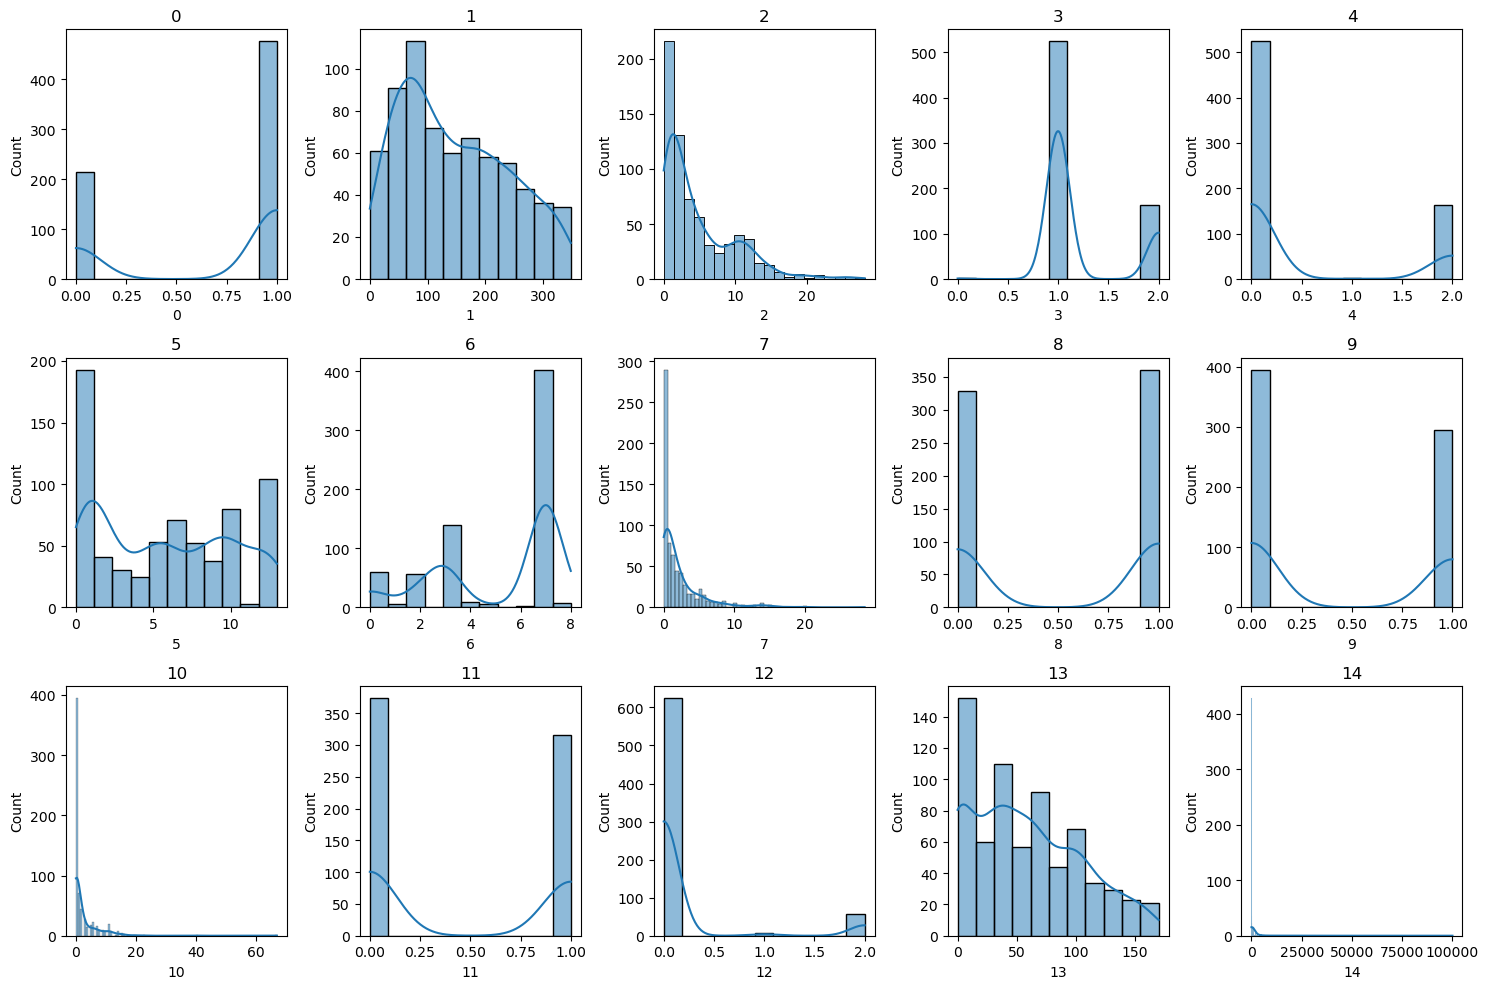

In [45]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 5, i+1)
    sns.histplot(X[col], kde=True)  
    plt.title(col)
plt.tight_layout()
plt.show()

#### We will visualize the target variable and have a look at how many approved and declined applications are there in our dataset.

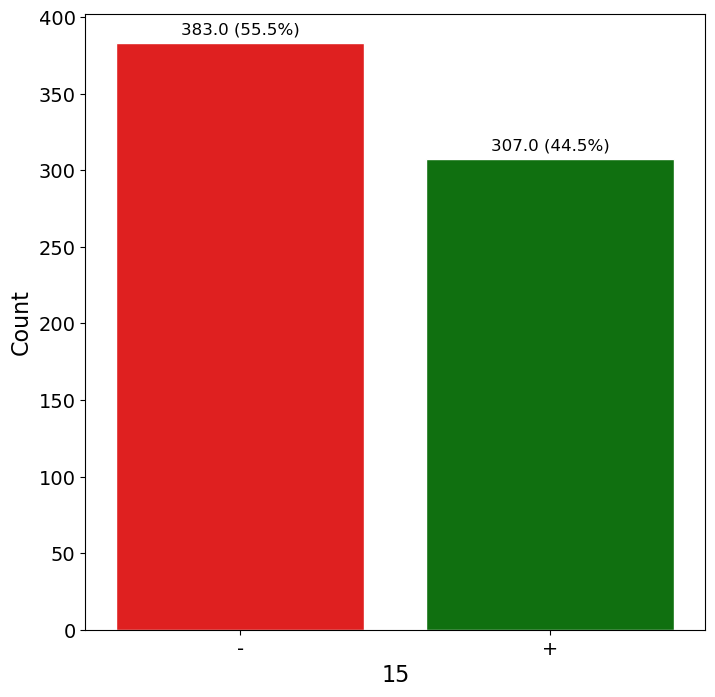

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
palette_colors = ["red", "green"]
sns.countplot(data=df, x=15, edgecolor="white", palette=palette_colors, order=df[15].value_counts().index)


total = df[15].value_counts().sum()


for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / total:.1%})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('15', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()


Out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. This tells us that our dataset has an equal representation of both the outcomes of our binary classifier.

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


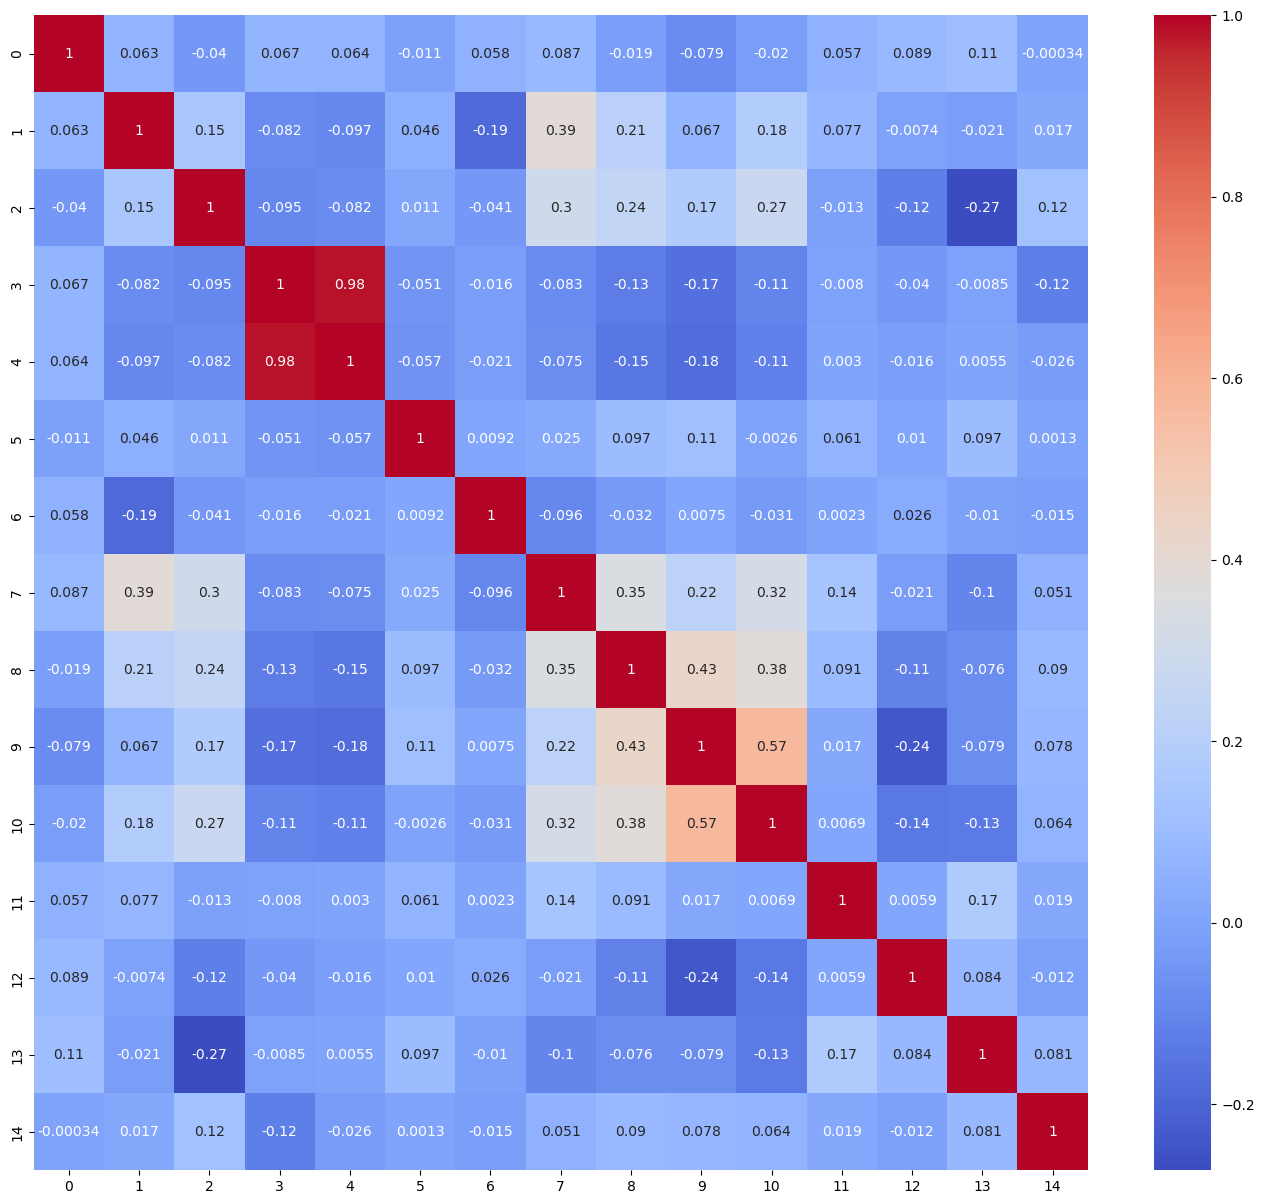

In [16]:
# Creating a colormap 
custom_cmap = sns.color_palette("coolwarm", as_cmap=True)

# Creating the heatmap with the custom colormap
fig, ax = plt.subplots(1, 1, figsize=(17, 15))
sns.heatmap(X.corr(), annot=True, cmap=custom_cmap)

plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.30, random_state=2)

In [18]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and useing it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledxTrain = scaler.fit_transform(X_train)
rescaledxTest = scaler.fit_transform(X_test)

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression 
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledxTrain, y_train)

LogisticRegression()

We have successfully created and fitted a LogisticRegression classifier to our training data.

Test: Accuracy = 0.8792270531400966
Train: Accuracy = 0.855072463768116


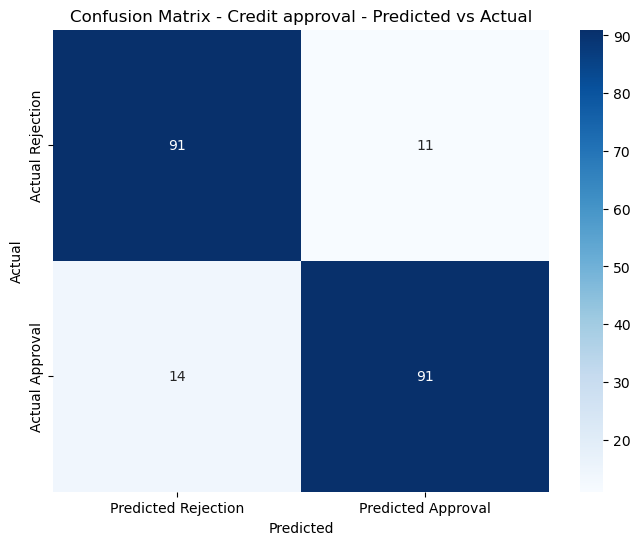

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledxTest)
y_pred1 = logreg.predict(rescaledxTrain)

# Get the accuracy score of the logreg model and print it
print("Test: Accuracy =", logreg.score(rescaledxTest, y_test))
print("Train: Accuracy =", logreg.score(rescaledxTrain, y_train))

# Print the confusion matrix of the logreg model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted Rejection", "Predicted Approval"],
            yticklabels=["Actual Rejection", "Actual Approval"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Credit approval - Predicted vs Actual')
plt.show()


The values in the diagonal of the confusion matrix denote the fraction of correct rejection (first-row first entry) or correct approval (second-row second entry) predictions by our classification model. Our logistic regression model has a classification accuracy of 87.9 %.

## Decision Tree Classifier (DTC) model

1 Train score: 0.8426501035196687 Test score: 0.8840579710144928
2 Train score: 0.8426501035196687 Test score: 0.8840579710144928
3 Train score: 0.8509316770186336 Test score: 0.855072463768116
4 Train score: 0.8737060041407867 Test score: 0.8357487922705314
5 Train score: 0.8881987577639752 Test score: 0.8405797101449275
6 Train score: 0.9254658385093167 Test score: 0.8115942028985508
7 Train score: 0.94824016563147 Test score: 0.821256038647343
8 Train score: 0.9668737060041408 Test score: 0.8115942028985508
9 Train score: 0.9813664596273292 Test score: 0.8309178743961353


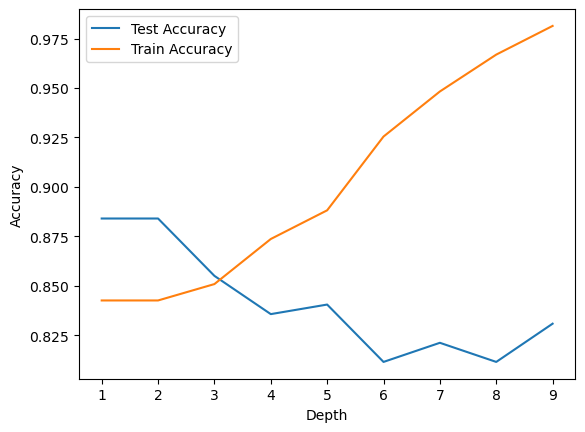

In [20]:
train_acc=[]
test_acc=[]
list_score=[]
p=[]

for i in range(1, 10):
    
    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)
    dtc.fit(X_train, y_train)

    train_pred = dtc.predict(X_train)
    #train_acc.append(score(train_pred, yTrain))
    
    test_pred = dtc.predict(X_test)
    #test_acc.append(score(test_pred, yTest))
    test_acc = accuracy_score(y_test, test_pred)
    train_acc = accuracy_score(y_train, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_pred,  y_train),accuracy_score(test_pred, y_test)]) 
    
    
df2 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()    

The plot provides a visual representation of how the accuracy of the model changes as the maximum depth of the Decision Tree changes. The x-axis represents the depth values, and the y-axis represents the accuracy values.The final test accuracy score of our decision tree model is 85.5 %.

## Gradient Boosting Classifier

Train score: 0.9813664596273292 Test score: 0.8695652173913043


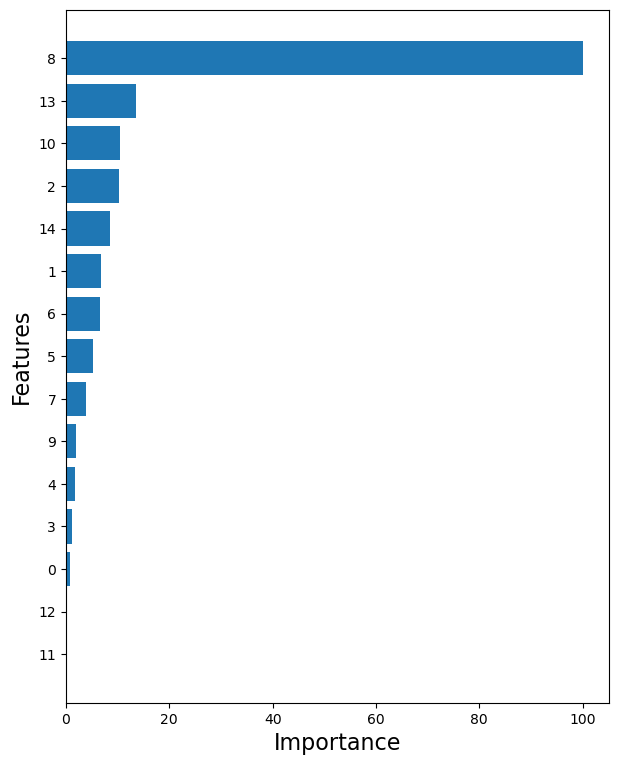

In [21]:

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)


test_acc = accuracy_score(y_test, test_predict)
train_acc = accuracy_score(y_train, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)



# Plot feature importance 
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# plt.subplot(1, 2, 2)

plt.figure(figsize=(7, 9))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.keys()[sorted_idx])
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Features',fontsize=16)
plt.show()

feature 11,12,0, their importance level is really low so we can remove them to see if the model performs better (test scores) and it may speed up the model

## XGBoost

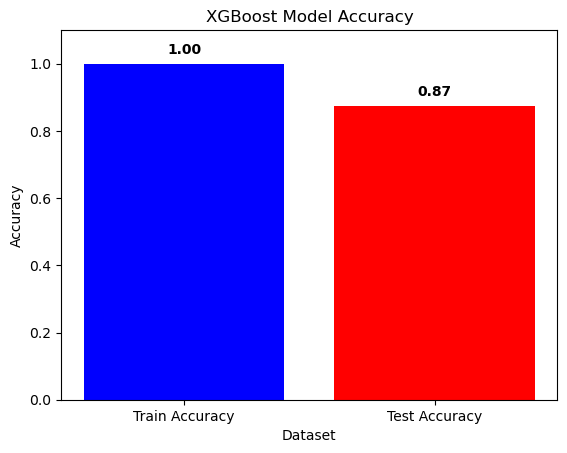

In [22]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Convert class labels to binary values
y_train_binary = [1 if label == '+' else 0 for label in y_train]
y_test_binary = [1 if label == '+' else 0 for label in y_test]

# Fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train_binary)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_acc = accuracy_score(y_train_binary, train_predict)
test_acc = accuracy_score(y_test_binary, test_predict)

# Data for plotting
labels = ['Train Accuracy', 'Test Accuracy']
scores = [train_acc, test_acc]

# Create a bar plot
plt.bar(labels, scores, color=['blue', 'red'])
plt.ylim(0, 1.1)  # Set y-axis limit to ensure visibility

# Add data values on top of the bars
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Add a title and labels
plt.title('XGBoost Model Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')

# Show the plot
plt.show()


## KNN

Train score: 0.7743271221532091 Test score: 0.6908212560386473


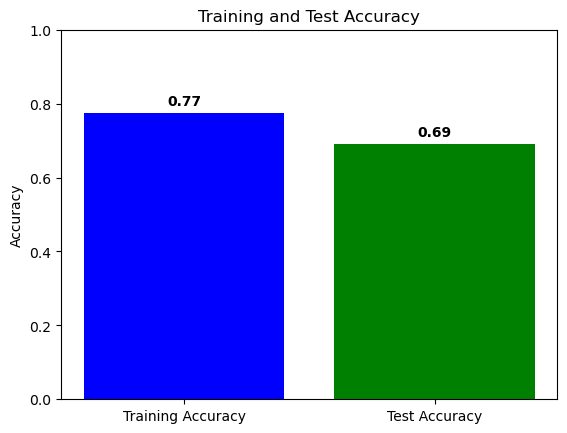

In [23]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predictions on the training and test sets
train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)

# Calculate accuracy scores
test_acc = accuracy_score(y_test, test_predict)
train_acc = accuracy_score(y_train, train_predict)

# Print accuracy scores
print('Train score:', train_acc, 'Test score:', test_acc)

# Visualize the output
labels = ['Training Accuracy', 'Test Accuracy']
scores = [train_acc, test_acc]

plt.bar(labels, scores, color=['blue', 'green'])
plt.ylim(0.0, 1.0)  # Set y-axis limits between 0 and 1
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')

# Display the accuracy values on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', color='black', fontweight='bold')

plt.show()



Train score: 0.8115942028985508 Test score: 0.6714975845410628
2 Train score: 0.8115942028985508 Test score: 0.6714975845410628
Train score: 0.7929606625258799 Test score: 0.6811594202898551
3 Train score: 0.7929606625258799 Test score: 0.6811594202898551
Train score: 0.7619047619047619 Test score: 0.6521739130434783
4 Train score: 0.7619047619047619 Test score: 0.6521739130434783
Train score: 0.7743271221532091 Test score: 0.6908212560386473
5 Train score: 0.7743271221532091 Test score: 0.6908212560386473
Train score: 0.7660455486542443 Test score: 0.6763285024154589
6 Train score: 0.7660455486542443 Test score: 0.6763285024154589
Train score: 0.7370600414078675 Test score: 0.6956521739130435
7 Train score: 0.7370600414078675 Test score: 0.6956521739130435
Train score: 0.7391304347826086 Test score: 0.7101449275362319
8 Train score: 0.7391304347826086 Test score: 0.7101449275362319
Train score: 0.7308488612836439 Test score: 0.7101449275362319
9 Train score: 0.7308488612836439 Test sc

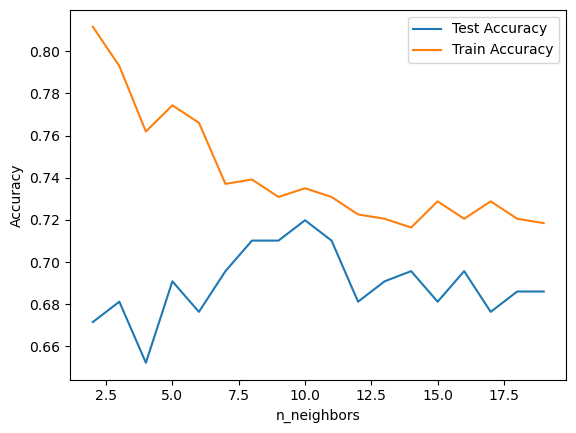

In [24]:
from sklearn.neighbors import KNeighborsClassifier

train_acc=[]
test_acc=[]
list_score=[]

for i in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)

    train_predict = knn.predict(X_train)
    test_predict = knn.predict(X_test)

    test_acc = accuracy_score(y_test, test_predict)
    train_acc = accuracy_score(y_train, train_predict)
    print('Train score:',train_acc,'Test score:',test_acc)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_predict, y_train),accuracy_score(test_predict, y_test)]) 
    
    
df3 = DataFrame (list_score,columns=['n_neighbors','Train Accuracy','Test Accuracy'])
plt.plot(df3['n_neighbors'],df3['Test Accuracy'],label='Test Accuracy')
plt.plot(df3['n_neighbors'],df3['Train Accuracy'],label='Train Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()    